<a href="https://colab.research.google.com/github/breenl/roboinvestidor/blob/main/vai_deixar_Gabriel_e_eu_rico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install yfinance

#pip install GoogleNews #Remover o primeiro hashtag para importar o gooogle news

#pip install newspaper3k # installar um por vez

#pip install yfinance

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression
import re
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
#Import the libraries
import nltk
from newspaper import Article
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import requests
import zipfile
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')
#data = pd.read_csv("result.csv")#Trello Area Logada Contratante

#data["title"]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:

from GoogleNews import GoogleNews
googlenews = GoogleNews()

googlenews.set_lang('pt')
#googlenews.set_period('7d')
googlenews.set_time_range('01/01/2019','12/31/2019')
googlenews.set_encode('utf-8')


googlenews.search('petrobras')#VVAR3
#googlenews.page_at(3)

#googlenews.total_count()
#googlenews.results()
#googlenews.get_texts()
#googlenews.get_links()

#https://pypi.org/project/GoogleNews/



In [ ]:
# lista de stopword
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')#set(STOPWORDS)


#Le as noticias e extrai automaticamente os textos
textos = []
forcaTexto = []
notas = []
datas = []
analyzer = SentimentIntensityAnalyzer()

try:
  for url in googlenews.get_links():
    article = Article(url)
    
    article.download() #Downloads the link’s HTML content
    article.parse() #Parse the article
    nltk.download('punkt')#1 time download of the sentence tokenizer
    article.nlp()#  Keyword extraction wrapper
    textos.append(article.summary)
    notas.append(analyzer.polarity_scores(article.summary)['compound'])
    forcaTexto.append(article.summary) 
    datas.append(article.publish_date)     
    # print(article.text)
    #print(article.title)
    # print(article.canonical_link)
    #print(article.summary)    
    #break
except Exception:
  print (Exception)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to

In [ ]:
# Sentimento positivo: nota >= 0.05
# Sentimento negativo: nota <= -0.05
# Sentimento neutro: (nota > -0.05) and (nota < 0.05)

resultado = list(zip(notas, forcaTexto,datas))

#Criar nuvem de palavras
paraNuvem = pd.DataFrame(resultado,columns=[["notas","textos","datas"]])

# tudo = " ".join(s for s in textos)

# wordcloud2 = WordCloud(stopwords=stopwords,background_color="black",
#                       width=1600, height=800).generate(tudo)
# plt.imshow(wordcloud2)
# plt.axis("off")
# plt.show()
paraNuvem.to_csv("valores.csv")

In [ ]:
#Baixar informações da B3
def download():
    cvmzip_list = [
        'dfp_cia_aberta_%d.zip' % y for y in range(2010, 2020)
    ]

    base_url = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/' #Ficar ligeiro com esse link, pode mudar

    for cvmzip in cvmzip_list:
        print('Arquivio:', cvmzip)
        response = requests.get(base_url + cvmzip)
        with open(cvmzip, 'wb') as fp:
            print('Download...')
            fp.write(response.content)

        with zipfile.ZipFile(cvmzip, 'r') as zip_ref:
            print('Unzip...')
            zip_ref.extractall()
            
download()

Arquivio: dfp_cia_aberta_2010.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2011.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2012.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2013.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2014.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2015.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2016.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2017.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2018.zip
Download...
Unzip...
Arquivio: dfp_cia_aberta_2019.zip
Download...
Unzip...


In [ ]:
import csv
from collections import defaultdict
from dateutil import parser as du_parser


def carrega_dados():

    # Estrutura para carregar os dados
    # Empresa -> Categoria -> Ano do Exercício
    dados = defaultdict(lambda: defaultdict(dict))

    cvm_csv_list = [
        '/content/dfp_cia_aberta_DRE_con_%d.csv' % y for y in range(2010, 2020)
    ]
    
    for cvm_csv in cvm_csv_list:
        
        print('Processando:', cvm_csv)
        with open(cvm_csv, encoding='iso-8859-1') as fp:

            next(fp) # Pula o header
            csv_reader = csv.reader(fp, delimiter=';')

            for row in csv_reader:
                #print(row)
                empresa = row[3]
                ref = (du_parser.parse(row[9]), du_parser.parse(row[10]))
                categoria = (row[11], row[12])
                valor = float(row[13])

                dados[empresa][categoria][ref] = valor
  
    return dados

dados = carrega_dados()



Processando: /content/dfp_cia_aberta_DRE_con_2010.csv
Processando: /content/dfp_cia_aberta_DRE_con_2011.csv
Processando: /content/dfp_cia_aberta_DRE_con_2012.csv
Processando: /content/dfp_cia_aberta_DRE_con_2013.csv
Processando: /content/dfp_cia_aberta_DRE_con_2014.csv
Processando: /content/dfp_cia_aberta_DRE_con_2015.csv
Processando: /content/dfp_cia_aberta_DRE_con_2016.csv
Processando: /content/dfp_cia_aberta_DRE_con_2017.csv
Processando: /content/dfp_cia_aberta_DRE_con_2018.csv
Processando: /content/dfp_cia_aberta_DRE_con_2019.csv


[*********************100%***********************]  1 of 1 completed
{datetime.datetime(2009, 12, 31, 0, 0): 105.04879, datetime.datetime(2010, 12, 31, 0, 0): 304.21692, datetime.datetime(2011, 12, 31, 0, 0): 374.07855, datetime.datetime(2012, 12, 31, 0, 0): 93.90934, datetime.datetime(2013, 12, 31, 0, 0): -2.57566, datetime.datetime(2014, 12, 31, 0, 0): 2.19588, datetime.datetime(2015, 12, 31, 0, 0): -459.96622, datetime.datetime(2016, 12, 31, 0, 0): 132.96496, datetime.datetime(2017, 12, 31, 0, 0): 176.69992, datetime.datetime(2018, 12, 31, 0, 0): 257.73768, datetime.datetime(2019, 12, 31, 0, 0): -86.9604}


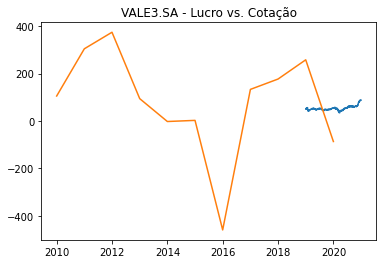

In [ ]:
import yfinance as yf
import matplotlib.pyplot as pyplot

def pega_cotacoes(tickers):
    return  yf.download(
            tickers = tickers,
            start="2019-01-01", end="2020-12-31",
            #interval = "1mo",
            group_by = 'ticker',
    )

#ticker
ticker = 'VALE3.SA'
empresa = 'VALE S.A.' #VIA VAREJO S.A.  ITAU UNIBANCO HOLDING S.A.
cotacoes = pega_cotacoes(ticker)

# trata o formato
q = cotacoes['Close'].dropna()
b = {
        k[1]: v / 100000
        for k, v in 
        dados[empresa][('3.11', 'Lucro/Prejuízo Consolidado do Período')].items() #Quando é itau a conta a 3.09
    }

print(b)
pyplot.plot(q)
pyplot.plot(list(b.keys()), list(b.values()))
pyplot.title(ticker + ' - Lucro vs. Cotação')
pyplot.show()


In [ ]:
sucesso = pd.DataFrame(dados, columns=['empresa','ref','categoria','valor'])


In [ ]:
sucesso.head()